<a href="https://colab.research.google.com/github/Tatsuyuki-Matsuda/EU_M_Math-Repository/blob/main/Chap07_Cm_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Cm-01-1
import pandas as pd
import matplotlib.pyplot as plt
import requests, zipfile
from io import StringIO
import io

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00312/dow_jones_index.zip'

r = requests.get(url, stream=True)

z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

import pandas as pd
dow_jones_index = pd.read_csv('dow_jones_index.data',sep=',')
dow_jones_index.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [2]:
dow_jones_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   quarter                             750 non-null    int64  
 1   stock                               750 non-null    object 
 2   date                                750 non-null    object 
 3   open                                750 non-null    object 
 4   high                                750 non-null    object 
 5   low                                 750 non-null    object 
 6   close                               750 non-null    object 
 7   volume                              750 non-null    int64  
 8   percent_change_price                750 non-null    float64
 9   percent_change_volume_over_last_wk  720 non-null    float64
 10  previous_weeks_volume               720 non-null    float64
 11  next_weeks_open                     750 non-n

In [3]:
#Cm-01-2
delete_dolchar = lambda x: str(x).replace('$', '')
dow_jones_index.open = pd.to_numeric(dow_jones_index.open.map(delete_dolchar))
dow_jones_index.high = pd.to_numeric(dow_jones_index.high.map(delete_dolchar))
dow_jones_index.low = pd.to_numeric(dow_jones_index.low.map(delete_dolchar))
dow_jones_index.close = pd.to_numeric(dow_jones_index.close.map(delete_dolchar))
dow_jones_index.next_weeks_open = pd.to_numeric(dow_jones_index.next_weeks_open.map(delete_dolchar))
dow_jones_index.next_weeks_close = pd.to_numeric(dow_jones_index.next_weeks_close.map(delete_dolchar))
dow_jones_index.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,15.82,16.72,15.78,16.42,239655616,3.79267,NaN,NaN,16.71,15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029


In [4]:
#Cm-01-3
dow_jones_index_stock_index = dow_jones_index.set_index(['date','stock'])
dow_jones_index_stock_index_unstack = dow_jones_index_stock_index.unstack()
dow_close_data = dow_jones_index_stock_index_unstack['close']
dow_close_data.describe()

stock,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,...,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,16.504400,46.712400,73.448000,13.051600,103.152000,17.899200,101.175600,52.873600,41.249600,19.784000,...,34.360400,25.920800,19.821600,64.002000,29.626800,59.160000,84.033200,36.46960,53.912800,82.111600
std,0.772922,2.396248,3.087631,1.417382,6.218651,1.984095,5.267066,2.367048,1.882473,0.912022,...,1.666357,1.416407,0.915085,1.828795,1.369257,2.649218,2.985547,0.93282,1.555639,3.137743
min,14.720000,43.530000,69.100000,10.520000,92.750000,14.930000,91.190000,48.350000,37.580000,17.970000,...,31.910000,23.700000,18.150000,60.600000,27.490000,53.330000,79.080000,34.95000,51.520000,75.590000
25%,16.030000,44.360000,71.640000,11.930000,99.590000,16.880000,97.900000,50.290000,39.450000,19.250000,...,33.060000,24.800000,19.190000,62.590000,28.430000,57.920000,82.520000,35.84000,52.540000,79.780000
50%,16.520000,46.250000,72.690000,13.370000,103.540000,17.520000,102.100000,52.910000,41.520000,19.950000,...,34.040000,25.680000,20.110000,64.300000,30.340000,59.210000,83.520000,36.31000,53.660000,82.630000
75%,17.100000,48.500000,74.840000,14.250000,107.210000,18.700000,103.750000,54.630000,42.950000,20.360000,...,35.820000,27.060000,20.530000,65.270000,30.710000,61.180000,85.320000,37.26000,55.290000,84.500000
max,17.920000,51.190000,79.780000,15.250000,115.410000,22.050000,109.660000,56.790000,43.560000,21.440000,...,37.350000,28.600000,20.970000,67.360000,31.410000,63.430000,89.580000,38.47000,56.700000,87.980000


In [5]:
#Cm-01-4
corr_data = dow_close_data.corr()
corr_data

stock,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
stock,,,,,,,,,,,,,,,,,,,,,
AA,1.000000,-0.132094,0.291520,0.432240,0.695727,0.277191,0.470529,0.762246,0.772470,0.740139,...,-0.194258,0.317951,0.111613,-0.162919,0.030825,0.405575,0.407474,0.728472,0.171045,0.685739
AXP,-0.132094,1.000000,0.792575,-0.746595,0.255515,-0.593743,0.236456,0.004094,-0.129064,-0.315425,...,0.767470,-0.561235,0.663768,0.670814,0.853905,0.589784,0.688131,0.239228,0.261840,-0.036042
BA,0.291520,0.792575,1.000000,-0.536545,0.627205,-0.465162,0.568946,0.417249,0.350917,0.139263,...,0.591316,-0.441828,0.729025,0.482806,0.802601,0.863653,0.916338,0.566156,0.224755,0.444624
BAC,0.432240,-0.746595,-0.536545,1.000000,-0.131058,0.813696,-0.295246,0.129762,0.421660,0.568918,...,-0.604937,0.817784,-0.695282,-0.311218,-0.786890,-0.418905,-0.508228,-0.089458,0.131447,0.123588
CAT,0.695727,0.255515,0.627205,-0.131058,1.000000,-0.375140,0.889416,0.902856,0.712870,0.463054,...,-0.030892,-0.325324,0.666647,-0.226021,0.482533,0.778439,0.734655,0.890315,-0.170677,0.803195
CSCO,0.277191,-0.593743,-0.465162,0.813696,-0.375140,1.000000,-0.548609,-0.175626,0.067161,0.362102,...,-0.286511,0.953722,-0.784896,0.036368,-0.704006,-0.549185,-0.496793,-0.228347,0.501898,-0.120732
CVX,0.470529,0.236456,0.568946,-0.295246,0.889416,-0.548609,1.000000,0.753270,0.555978,0.266078,...,-0.050057,-0.537355,0.760903,-0.318407,0.537364,0.730893,0.616767,0.764618,-0.436621,0.802900
DD,0.762246,0.004094,0.417249,0.129762,0.902856,-0.175626,0.753270,1.000000,0.826926,0.675104,...,-0.247912,-0.098323,0.391957,-0.331892,0.219675,0.659724,0.614146,0.796600,-0.144215,0.863511
DIS,0.772470,-0.129064,0.350917,0.421660,0.712870,0.067161,0.555978,0.826926,1.000000,0.817387,...,-0.307803,0.104224,0.177924,-0.255484,-0.047071,0.573376,0.424170,0.594160,-0.062269,0.803492


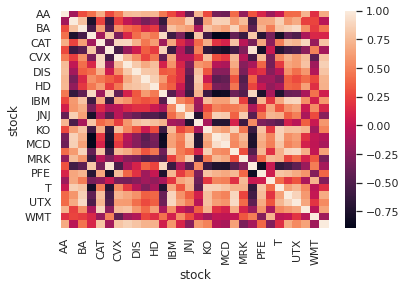

In [6]:
import seaborn as sns
sns.set()
sns.heatmap(corr_data)

In [7]:
#Cm-01-5
max_corr = 0
stock_1 = ''
stock_2 = ''

for i in range(0,len(corr_data)):
    print(
        corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]].idxmax()[1],
        corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]].idxmax()[0],
        corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]][0]
    )
    if max_corr < corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]][0]:
        max_corr = corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]][0]
        stock_1 = corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]].idxmax()[1]
        stock_2 = corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]].idxmax()[0]

print('[Max Corr]:',max_corr)
print('[stock_1]:',stock_1)
print('[stock_2]:',stock_2)

AA DIS 0.772469765562022
AXP KRFT 0.8735103611554015
BA UTX 0.9163379610743163
BAC HPQ 0.9058167680009366
CAT DD 0.9028558103078962
CSCO MSFT 0.9537216645891365
CVX CAT 0.8894156562923726
DD CAT 0.9028558103078962
DIS DD 0.8269258130241479
GE HD 0.8582069310150248
HD GE 0.8582069310150248
HPQ BAC 0.9058167680009366
IBM UTX 0.897552383536252
INTC BA 0.6910939563691997
JNJ KRFT 0.8612879882611022
JPM GE 0.8304508594360406
KO T 0.8689952415835726
KRFT MCD 0.9299213037922912
MCD KRFT 0.9299213037922912
MMM UTX 0.9136955626526878
MRK JNJ 0.8440270438854456
MSFT CSCO 0.9537216645891365
PFE T 0.806543944675414
PG MRK 0.7497131367292452
T KO 0.8689952415835726
TRV MMM 0.8917262016156653
UTX BA 0.9163379610743163
VZ CAT 0.8903147891825167
WMT PG 0.7237055485083297
XOM DD 0.86351075593998
[Max Corr]: 0.9537216645891365
[stock_1]: CSCO
[stock_2]: MSFT


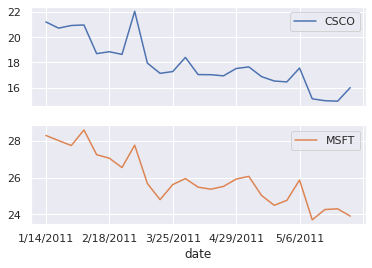

In [8]:
dow_close_data_subsets =dow_close_data[[stock_1,stock_2]]
dow_close_data_subsets.plot(subplots=True,grid=True)
plt.grid(True)

In [9]:
#Cm-01-6
dow_close_data.rolling(center=False,window=5).mean().head(10)

stock,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,,
1/14/2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/21/2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/28/2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/7/2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/11/2011,16.336,45.444,70.500,14.424,95.942,20.506,93.524,50.556,40.148,19.704,...,34.324,27.984,18.404,64.974,28.314,55.552,80.998,35.672,55.402,78.844
2/18/2011,16.598,45.300,71.094,14.324,98.312,20.034,94.702,51.792,41.002,20.228,...,34.048,27.736,18.574,64.728,28.342,56.810,82.184,35.904,55.516,80.176
2/25/2011,16.776,44.806,71.218,14.314,100.162,19.618,96.366,52.936,41.644,20.444,...,33.706,27.442,18.674,64.114,28.302,57.730,82.818,36.108,54.720,81.448
2/4/2011,16.978,44.798,71.648,14.452,100.944,19.842,97.114,53.384,42.016,20.516,...,33.670,27.446,18.904,63.996,28.398,58.050,83.036,36.244,54.586,82.306
3/11/2011,16.900,44.782,72.100,14.478,102.202,19.238,98.862,54.012,42.712,20.902,...,32.746,26.862,19.130,63.394,28.320,59.160,83.476,36.228,54.288,83.612


max volatility: CSCO
min volatility: KO


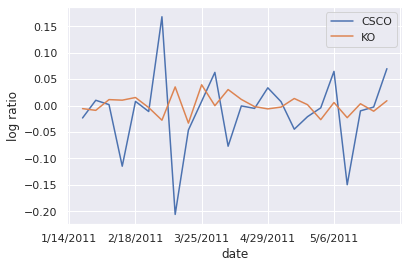

In [10]:
#Cm-01-7
import numpy as np
log_ratio_stock_close = np.log(dow_close_data/dow_close_data.shift(1))

max_vol_stock = log_ratio_stock_close.std().idxmax()
min_vol_stock = log_ratio_stock_close.std().idxmin()

print('max volatility:',max_vol_stock)
print('min volatility:',min_vol_stock)

log_ratio_stock_close[max_vol_stock].plot()
log_ratio_stock_close[min_vol_stock].plot()
plt.ylabel('log ratio')
plt.legend()
plt.grid(True)